In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/dom/anaconda3/envs/wann/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [76]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sequence(theta_dot, theta_sin, theta_cos, x_dot, x, bias, w):
    out = theta_cos
    out = np.abs(out * w)
    out = -(out * w + theta_sin * w + bias * w)
    out = np.sin(out * w)
    out = np.abs(out * w)
    out = sigmoid(out * w)
    out = sigmoid(out * w)
    out = np.max((0, out * w + theta_dot * w))
    out = sigmoid(out * w)
    out = np.cos(out * w + x * w - bias * w * w)
    out = np.sin(out * w)
    out = out * w - x * w
    return out

# for w in [-2, -1, -0.5, 0.5, 1, 2]:
#     xs = [sequence(x, x, x, x, x, w) for x in np.linspace(-5,5,1000)]
#     plt.plot(np.linspace(-5,5,1000), xs, label=f"Weight {w}")
# plt.legend()

In [213]:
# xs = [sequence(0.2, 2, 2, 7, w) for w in np.linspace(-3,3,1000)]
# plt.plot(np.linspace(-3,3,1000), xs)

# xs = [sequence(0.2, 2, -2, 7, w) for w in np.linspace(-3,3,1000)]
# plt.plot(np.linspace(-3,3,1000), xs)

In [4]:
from domain.cartpole_swingup import *

In [78]:
env = CartPoleSwingUpEnv()

In [90]:
obs = env.reset()
obs = env.step([0.0])
ls = {}
weights = [-2, -1, 0.5, 3, 1, 2]
for w in weights:
    ls[w] = []

for i in range(1000):
    for w in weights:
        action = [sequence(*obs[0], 0, w)]
        ls[w].append(action)
    obs = env.step(action)

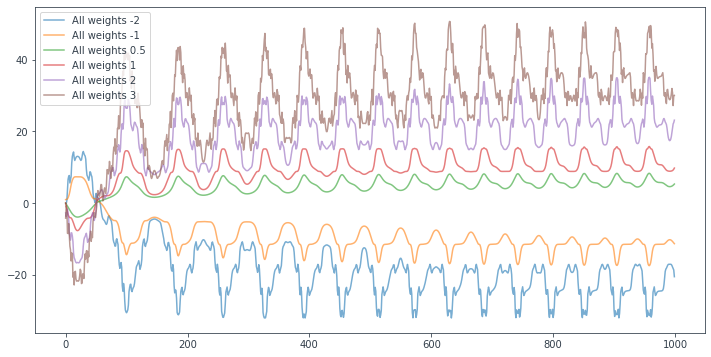

In [93]:
plt.subplots(figsize=(12,6))
for key in sorted(ls):
    plt.plot(ls[key], label=f"All weights {key}", alpha=0.6)
plt.legend()
# plt.savefig("weight_runs.png")

In [2]:
from vis.viewInd import *

# of Connections in ANN:  73
done


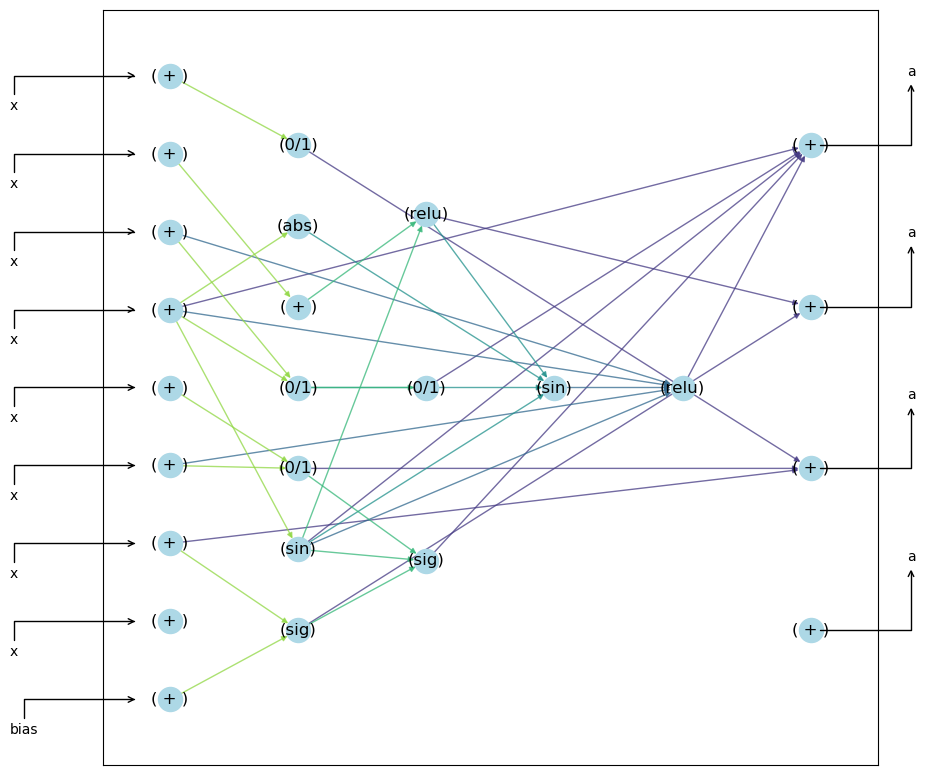

In [3]:
viewInd("log/lander_best/0112.out", "lander")
print("done")

# of Connections in ANN:  297
done


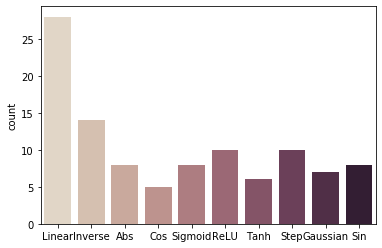

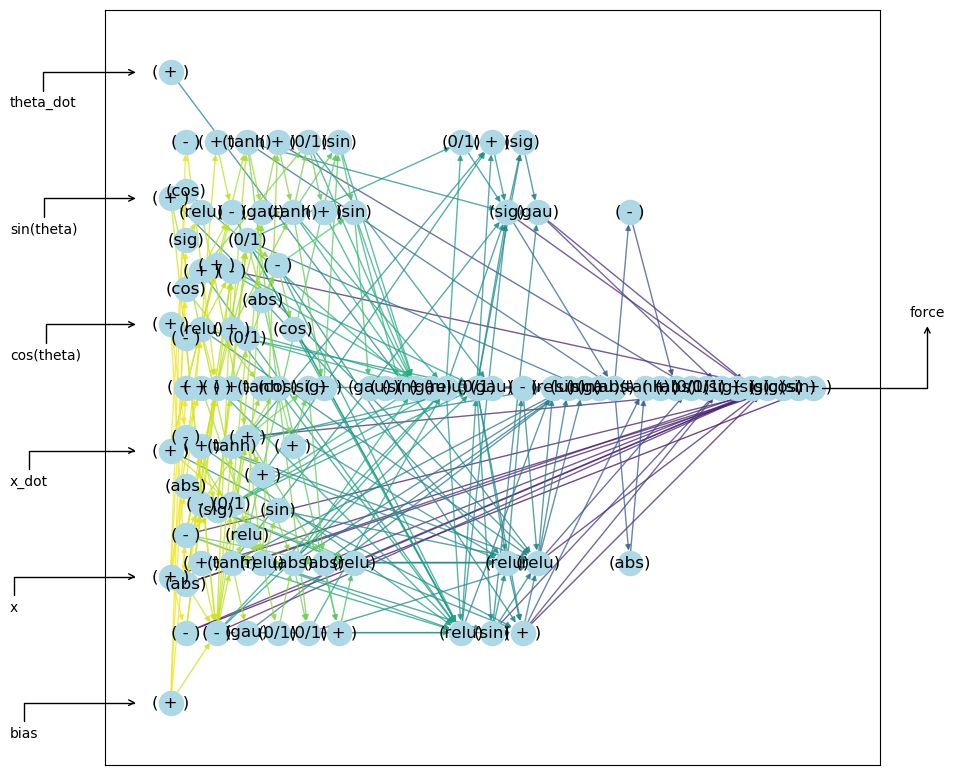

In [9]:
viewInd("log/test_best.out", "swingup")
print("done")

# of Connections in ANN:  297


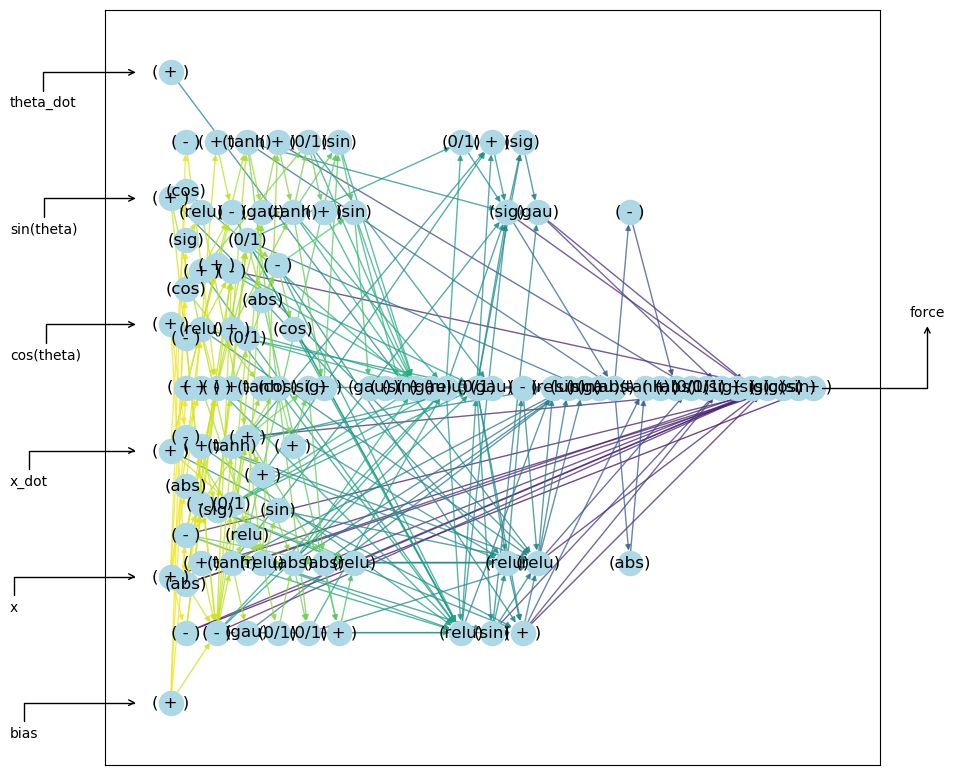

In [48]:
import seaborn as sns
fig, ax, named_a = viewInd("log/test_best.out", "swingup")

In [61]:
fig, ax, named_a = viewInd("log/test_best/0008.out", "swingup")

plt.subplots(figsize=(12,6))

name, counts = np.unique(named_a, return_counts=True)
order = [x for _,x in reversed(sorted(zip(counts,name)))]

sns.countplot(named_a, palette="ch:.25",orient="h", order=order)
plt.savefig("histograms/hist1.png")

# of Connections in ANN:  8


# of Connections in ANN:  61
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
# of Connections in ANN:  56
# of Connections in ANN:  38
# of Connections in ANN:  47
# of Connections in ANN:  73
# of Connections in ANN:  73
# of Connections in ANN:  47
# of Connections in ANN:  57
# of Connections in ANN:  61
# of Connections in ANN:  61
# of Connections in ANN:  73
# of Connections in ANN:  56
# of Connections in ANN:  57
# of Connections in ANN:  73


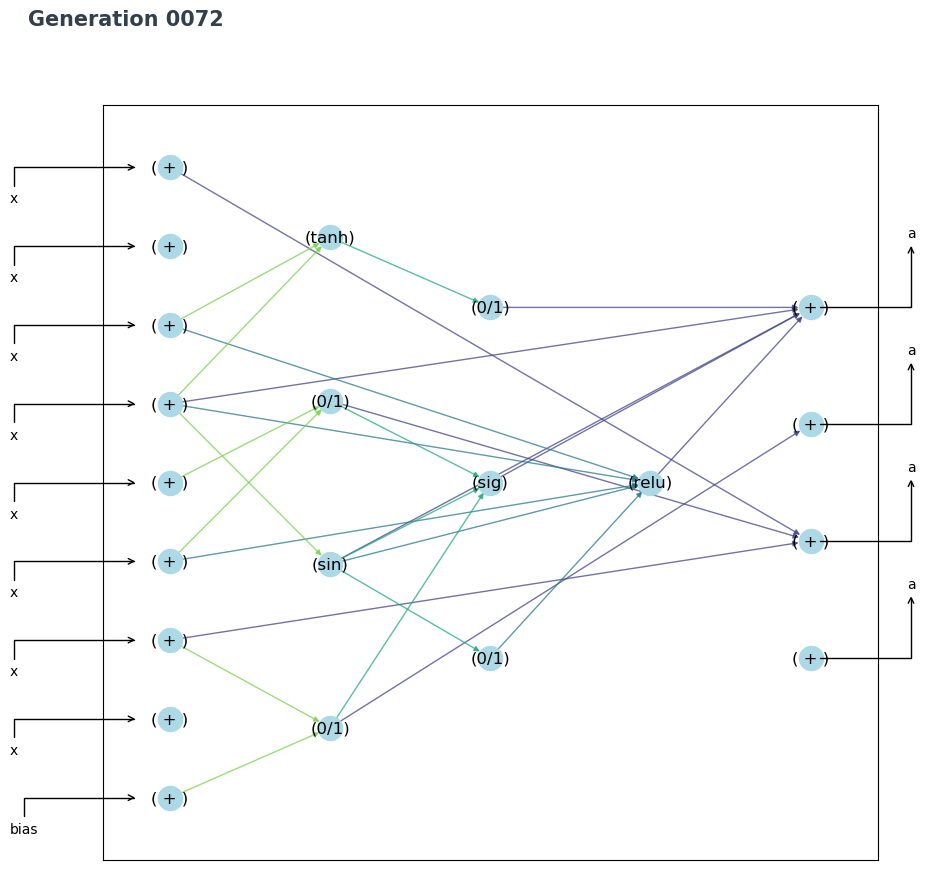

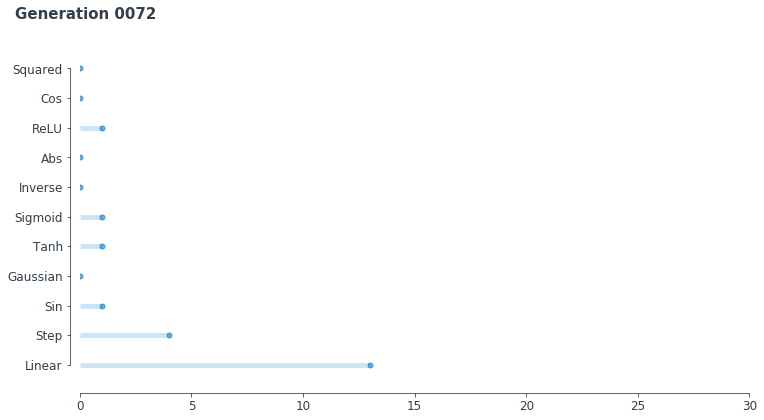

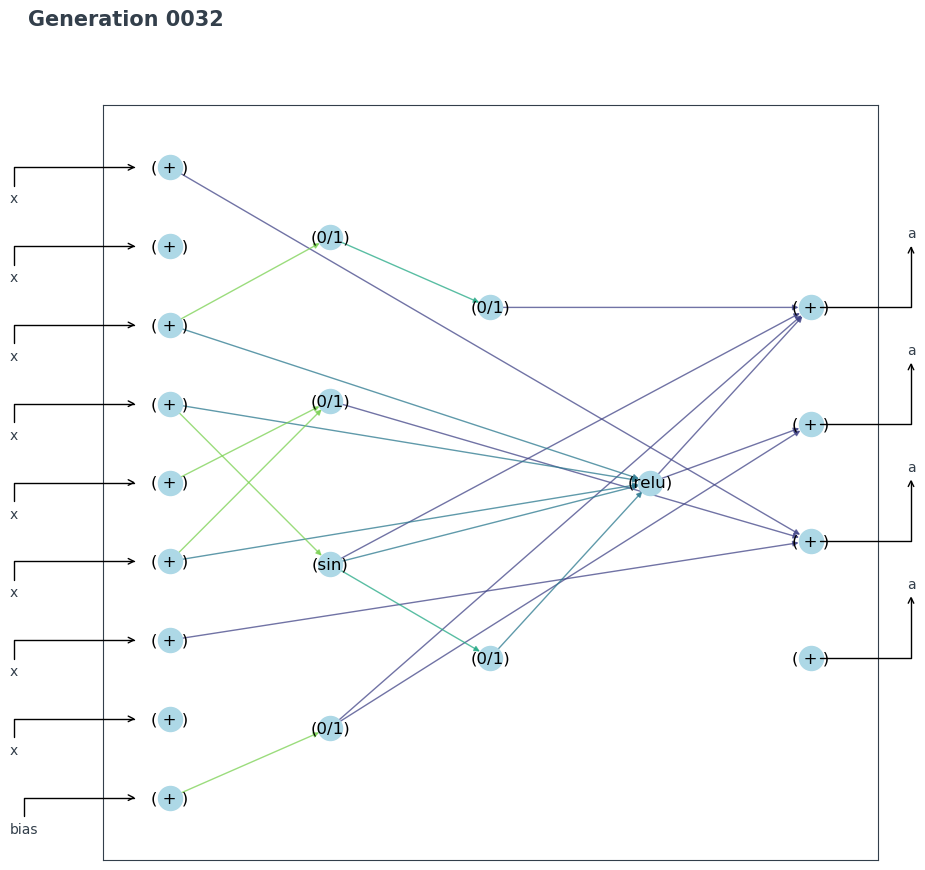

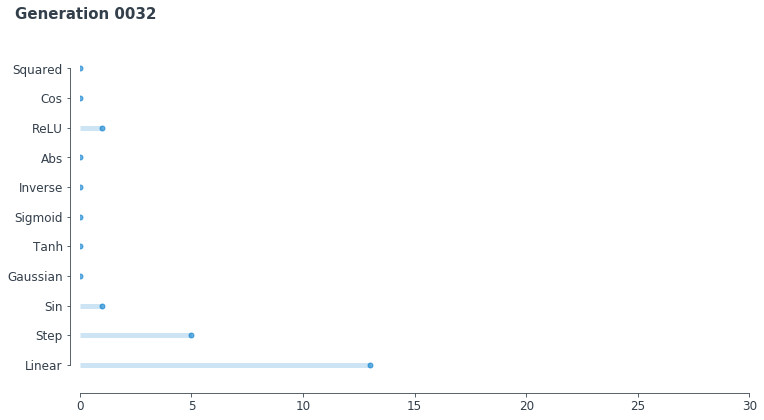

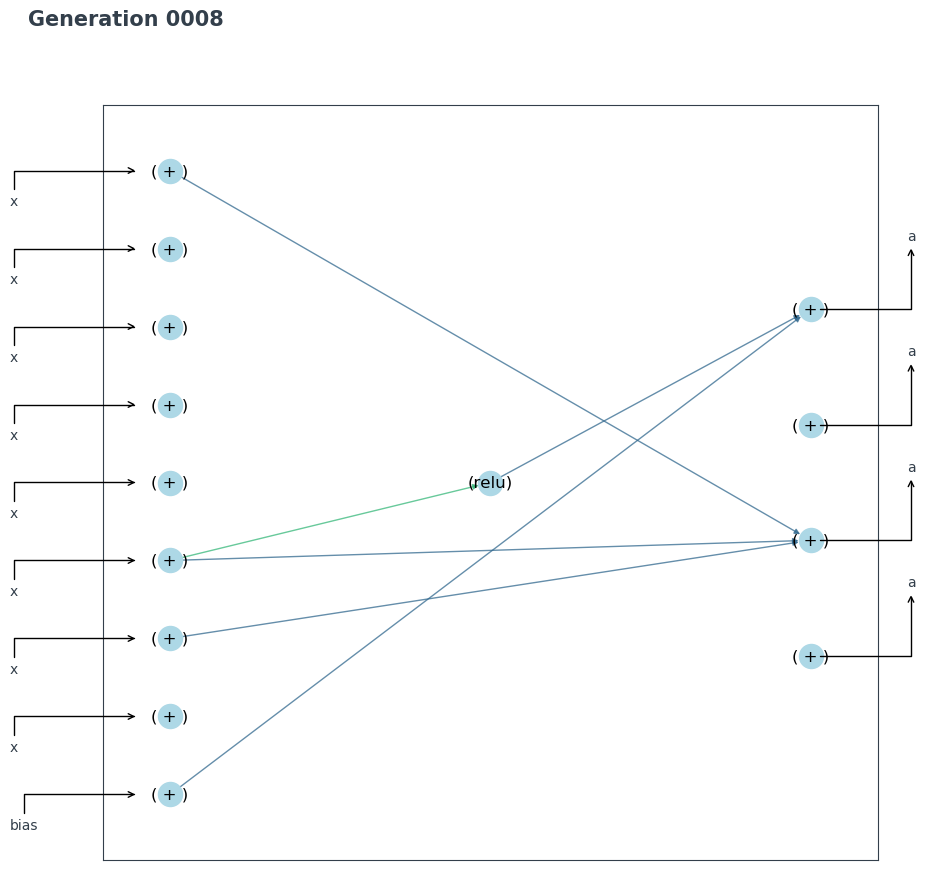

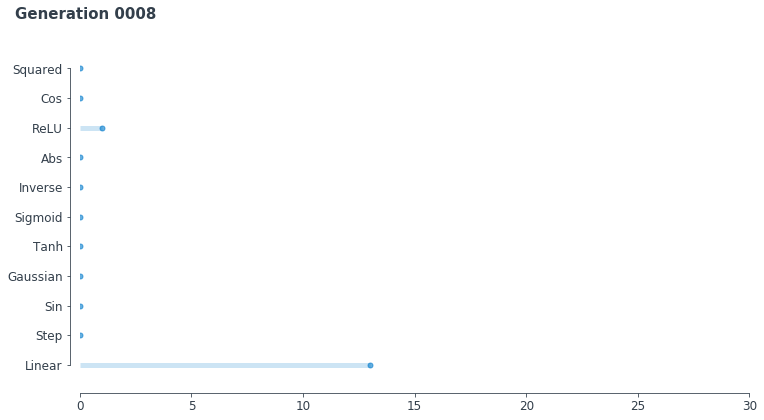

Error in callback <function flush_figures at 0x7fe2f4c07a60> (for post_execute):


KeyboardInterrupt: 

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for file in os.listdir("log/lander_best"):
    if file.endswith(".out"):
        
        fig, ax, counts = viewInd(os.path.join("log/lander_best", file), "lander")
        fig.text(0.05, 0.96, f'Generation {file[:4]}', fontsize=15, fontweight='black', color = '#333F4B')
        fig.savefig(f"arch_lander/{file[:4]}.png")
        names = [*counts]
        counts = [*counts.values()]

        # set font
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Helvetica'

        # set the style of the axes and the text color
        plt.rcParams['axes.edgecolor']='#333F4B'
        plt.rcParams['axes.linewidth']=0.8
        plt.rcParams['xtick.color']='#333F4B'
        plt.rcParams['ytick.color']='#333F4B'
        plt.rcParams['text.color']='#333F4B'

        # create some fake data
        percentages = pd.Series(counts, index=names)
        df = pd.DataFrame({'percentage' : percentages})
        # df = df.sort_values(by='percentage')

        # we first need a numeric placeholder for the y axis
        my_range=list(range(1,len(df.index)+1))

        fig, ax = plt.subplots(figsize=(12,6))

        # create for each expense type an horizontal line that starts at x = 0 with the length 
        # represented by the specific expense percentage value.
        plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

        # create for each expense type a dot at the level of the expense percentage value
        plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

        # set labels
        # ax.set_xlabel('Percentage', fontsize=15, fontweight='black', color = '#333F4B')
        # ax.set_ylabel('')

        # set axis
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.yticks(my_range, df.index)
        plt.xlim((0,30))

        # add an horizonal label for the y axis 
        # fig.text(-0.23, 0.96, 'Transaction Type', fontsize=15, fontweight='black', color = '#333F4B')
        fig.text(0.05, 0.96, f'Generation {file[:4]}', fontsize=15, fontweight='black', color = '#333F4B')

        # change the style of the axis spines
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        # ax.spines['bottom'].set_smart_bounds(True)

        # set the spines position
        ax.spines['bottom'].set_position(('axes', -0.04))
        ax.spines['left'].set_position(('axes', -0.015))

        plt.savefig(f"histograms_lander/{file[:4]}.png")

# of Connections in ANN:  8


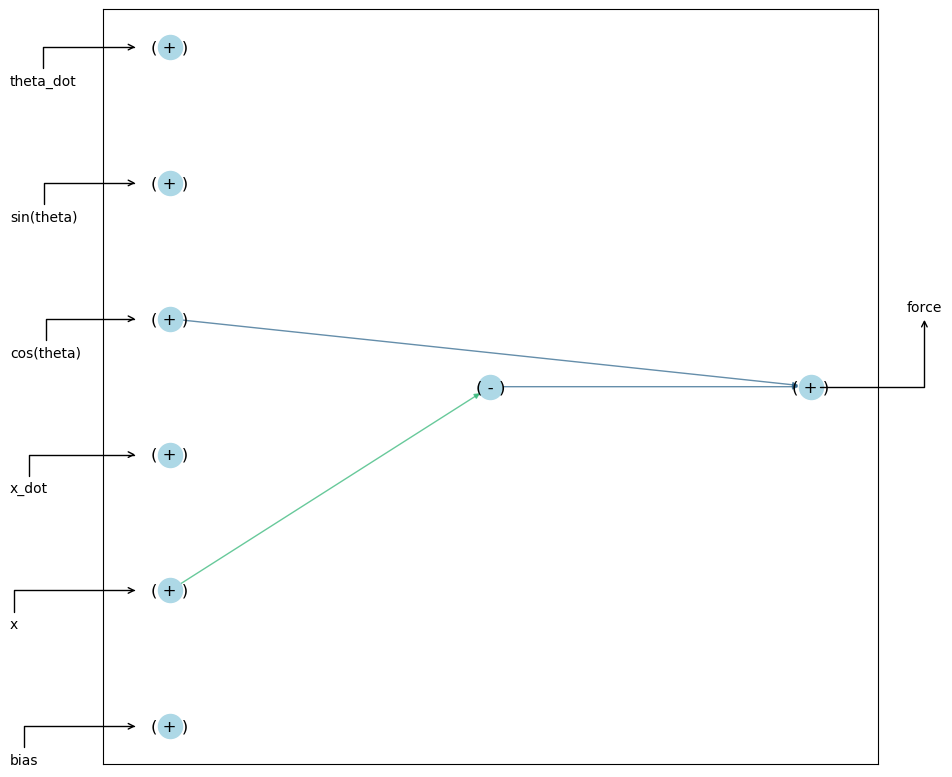

In [5]:
fig, ax, counts = viewInd("log/test_best/0008.out", "swingup")
names = [*counts]
counts = [*counts.values()]

# plt.subplots(figsize=(12,6))

# name, counts = np.unique(named_a, return_counts=True)
# order = [x for _,x in reversed(sorted(zip(counts,name)))]
# order = name

# dy = sns.countplot(named_a, palette="ch:.25",orient="h", order=order)
# dy.set(xlabel='Release Year', ylabel = "Count")
# plt.show()

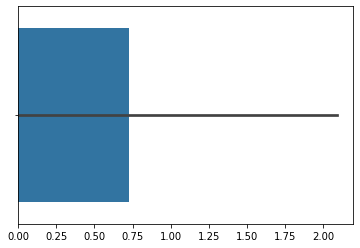

In [11]:
# plt.bar(["a", "b", "c"], [1, 1, 0])
import pandas as pd
import seaborn as sns
df = 

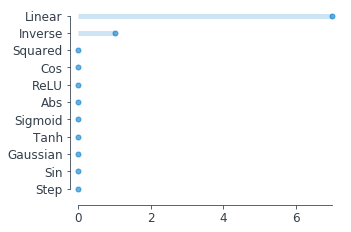

In [25]:
aVec = [1,1,1,2,3,3]
activations = {1: "Linear",
                 2: "Step",
                 3: "Sin",
                 4: "Gaussian",
                 5: "Tanh",
                 6: "Sigmoid",
                 7: "Inverse",
                 8: "Abs",
                 9: "ReLU",
                 10: "Cos",
                 11: "Squared"}
named_a = [activations[a] for a in aVec]
counts = {}
for a in activations:
    counts[activations[a]] = 0

for a in named_a:
    counts[a] += 1

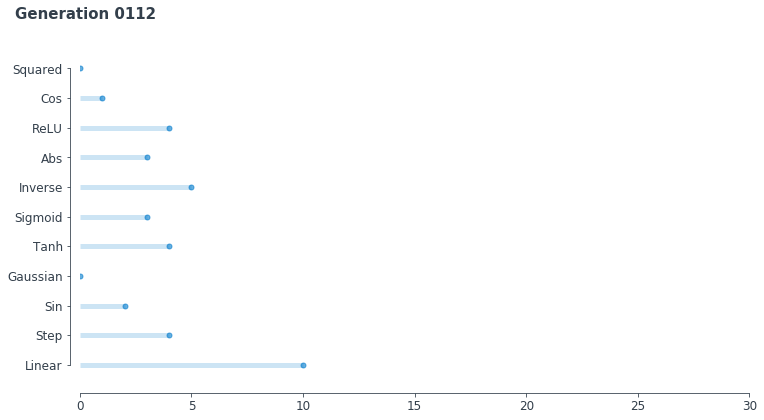

In [71]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
percentages = pd.Series(counts, index=names)
df = pd.DataFrame({'percentage' : percentages})
# df = df.sort_values(by='percentage')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(12,6))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
# ax.set_xlabel('Percentage', fontsize=15, fontweight='black', color = '#333F4B')
# ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)
plt.xlim((0,30))

# add an horizonal label for the y axis 
fig.text(0.05, 0.96, f'Generation {file[:4]}', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
# ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', -0.015))

In [10]:
import gym
# import gym_ple
import Box2D
env = gym.make('LunarLander-v2')

In [11]:
obs = env.reset()

In [20]:
import numpy as np
obs = env.step(np.array(0))